In [22]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import scipy
from scipy import misc
from scipy import ndimage
import math
import cv2

In [23]:
def element_multiply(convolution,kernel,B):
    x = np.multiply(convolution,kernel)
    ho = np.sum(x)
    Z = ho + float(B)
    return ho

In [24]:
def Convolution(image,kernel,B,P,S):
    o_dimensions = image.shape
#     (nH_prev,nW_prev,nC_prev) = image.shape
#     print((nH_prev,nW_prev,nC_prev))
    print(o_dimensions)
    print("Dimensions : " , o_dimensions[0] ,' X ',o_dimensions[1] )
    k_dimensions = kernel.shape

    print("Dimensions : " , k_dimensions[0] ,' X ',k_dimensions[1] )
    nC_curr = k_dimensions[2]
    nH_curr = math.floor((o_dimensions[0] + 2*P - k_dimensions[0])/S + 1)
    nW_curr = math.floor((o_dimensions[1] + 2*P - k_dimensions[0])/S + 1)
    
    print("nH_curr ",nH_curr)
    print("nW_curr",nW_curr)
    print("nC_curr",nC_curr)
    
    Z = np.zeros((nH_curr,nW_curr,nC_curr))
    #print(Z.shape)
    for row in range(nH_curr):
        for column in range(nW_curr):
            for channel in range(nC_curr):    
                row_start = row*S
                row_end = row_start + k_dimensions[0]
                col_start = column*S
                col_end = col_start + k_dimensions[0]
                conv = resize_image[row_start:row_end,col_start:col_end]
                Z[row,column,channel] = element_multiply(conv,kernel[:,:,channel],B[:,:,channel])
    
#     assert(Z.shape == (nH_curr,nW_curr,nC_curr))
    
    return Z

/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


(32, 32)
Resize Image Shape :  (32, 32)
(32, 32)
Dimensions :  32  X  32
Dimensions :  5  X  5
nH_curr  28
nW_curr 28
nC_curr 6
Convolution Shape :  (28, 28, 6)


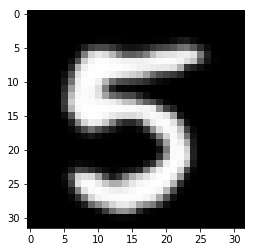

In [25]:
image_file = "test.png"
# image_file = "cat.jpeg"
image_array = np.array(ndimage.imread(image_file,flatten=False))
# image_array = np.array(misc.imread(image_file,flatten=False))
# img = Image.open('./test.png')
# img = np.asarray(img)
# print(img.shape)

resize_image = scipy.misc.imresize(image_array,(32,32))

# img = cv2.imread(image_file)
# resize_image = cv2.resize(img,dsize=(32,32),interpolation=cv2.INTER_CUBIC)

print(resize_image.shape)
print("Resize Image Shape : ",resize_image.shape)
plt.imshow(resize_image,cmap = plt.cm.binary)
kernel = np.random.rand(5,5,6) 
B = np.random.rand(1,1,6) 
P = 0
S = 1

Z = Convolution(resize_image,kernel,B,P,S)
print("Convolution Shape : ",Z.shape)
# print(Z)

/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


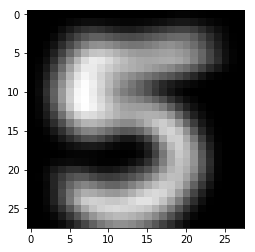

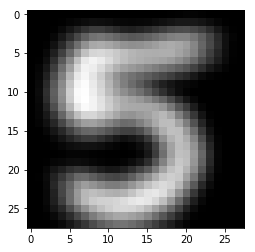

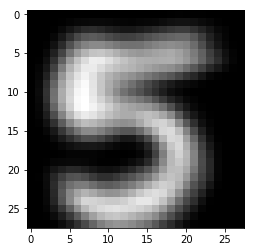

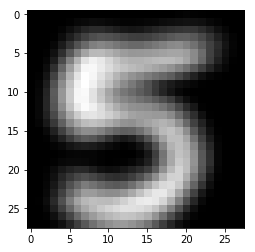

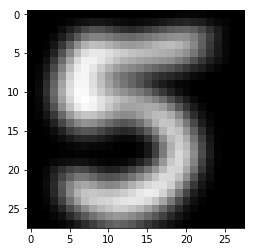

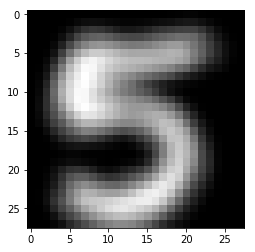

In [26]:
layer_1 = Z.squeeze()
# print(layer_1)
for i in range(6):
    plt.figure()
    resize_image = scipy.misc.imresize(layer_1[:,:,i],size = (28,28))
#     resize_image = cv2.resize(layer_1[:,:,i],dsize=(28,28),interpolation=cv2.INTER_CUBIC)
    print(resize_image.shape)
    plt.imshow(resize_image,cmap = plt.cm.binary)

In [27]:
def MAX(pool_layer,f,stride):
    (nH_prev,nW_prev,nC_prev) = pool_layer.shape
    
    print("nH_prev ",nH_prev)
    print("nW_prev ",nW_prev)
    print("nC_prev ",nC_prev)
    
    nH_curr = int(1 + (nH_prev - f)/stride)
    nW_curr = int(1 + (nW_prev - f)/stride)
    nC_curr = nC_prev
    
    Z = np.zeros((nH_curr,nW_curr,nC_curr))
    
    for row in range(nH_curr):
        for column in range(nW_curr):
            for channel in range(nC_curr):
                
                row_start = row*stride
                row_end = row_start + f
                col_start = column*stride
                col_end = col_start + f
                
                conv = pool_layer[row_start:row_end,col_start:col_end,:]
                
                Z[row,column,channel] = np.max(conv)
                
    assert(Z.shape == (nH_curr,nW_curr,nC_curr))
    
    return Z    

In [28]:
next_layer = Z
f = 2
S = 2
Z = MAX(next_layer,f,S)
print("Max Pooling Shape : ",Z.shape)

nH_prev  28
nW_prev  28
nC_prev  6
Max Pooling Shape :  (14, 14, 6)


/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


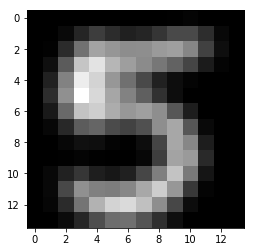

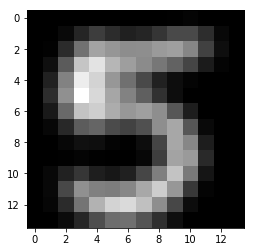

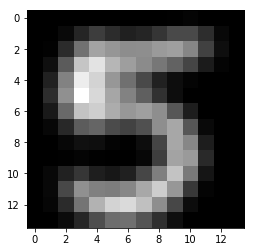

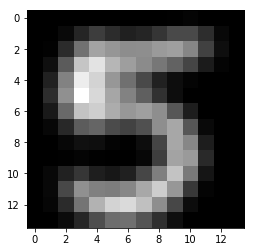

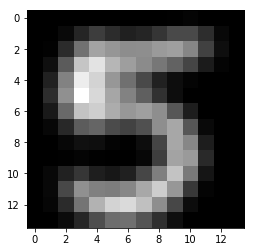

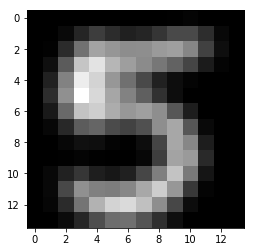

In [29]:
layer_2 = Z.squeeze()
for i in range(6):
    plt.figure()
    resize_image = scipy.misc.imresize(layer_2[:,:,i],size = (14,14))
    plt.imshow(resize_image,cmap = plt.cm.binary)

(14, 14, 6)
(14, 14, 6)
Dimensions :  14  X  14
Dimensions :  5  X  5
nH_curr  10
nW_curr 10
nC_curr 16
(10, 10, 16)


/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


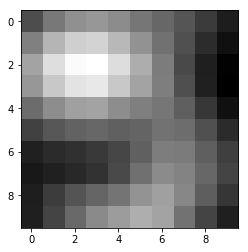

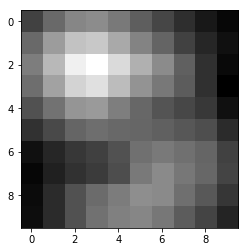

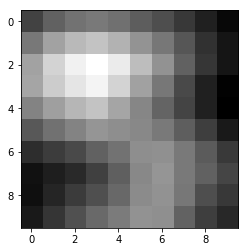

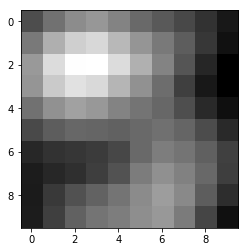

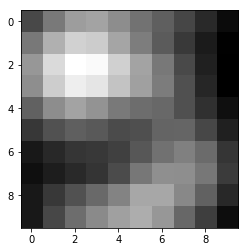

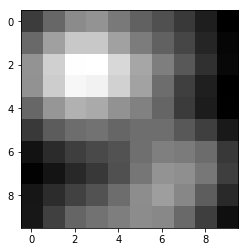

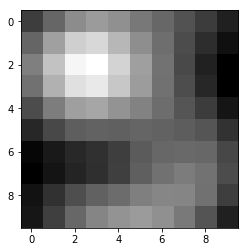

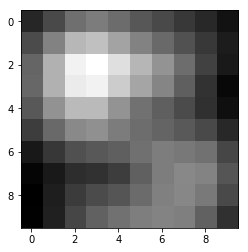

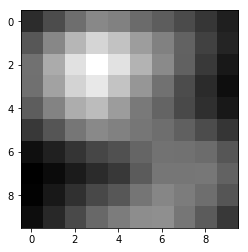

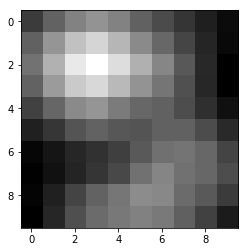

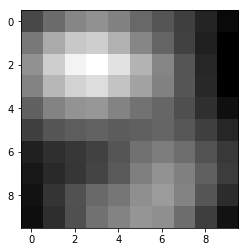

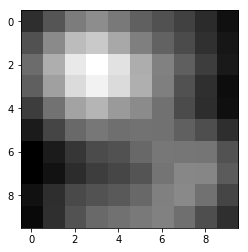

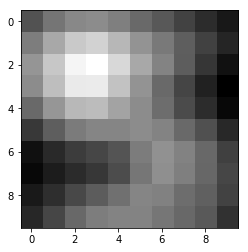

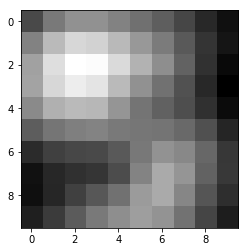

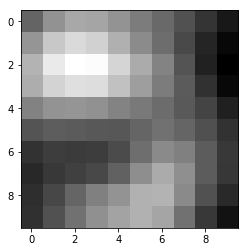

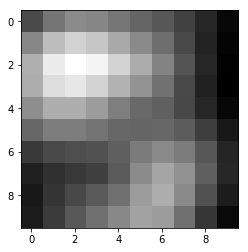

In [30]:
layer_3 = Z
print(layer_3.shape)
kernel = np.random.rand(5,5,16)
B = np.random.rand(1,1,16) 
P = 0
S = 1

Z = Convolution(layer_3,kernel,B,P,S)
print(Z.shape)

output = Z.squeeze()
for i in range(16):
    plt.figure()
    resize_image = scipy.misc.imresize(output[:,:,i],size = (10,10))
    plt.imshow(resize_image,cmap = plt.cm.binary)

nH_prev  10
nW_prev  10
nC_prev  16
Max Pooling Shape :  (5, 5, 16)


/home/adi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.


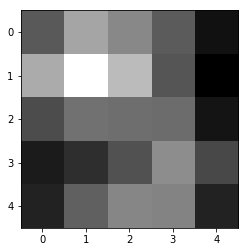

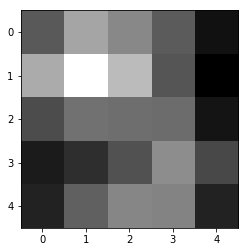

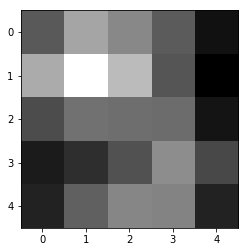

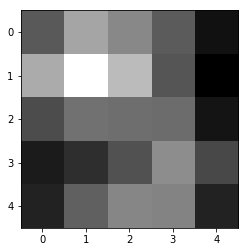

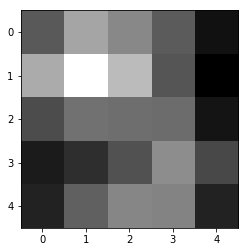

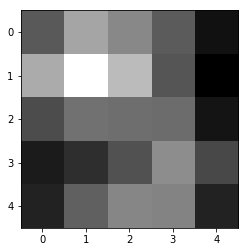

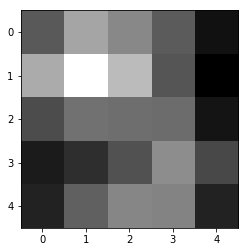

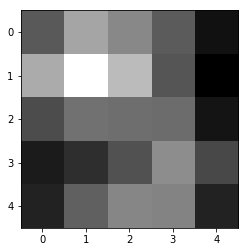

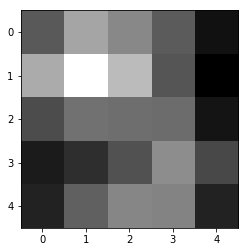

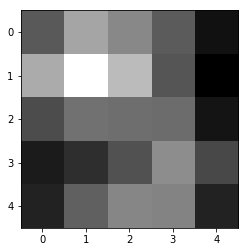

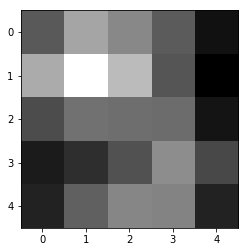

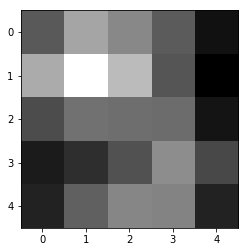

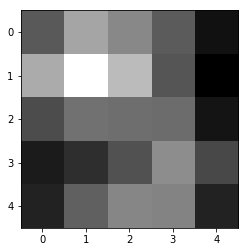

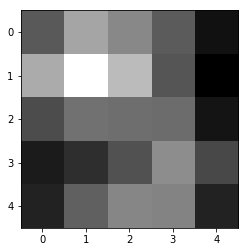

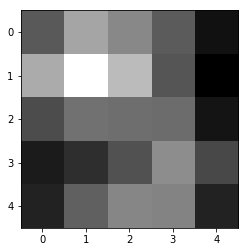

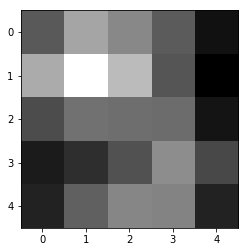

In [31]:
next_layer = Z
f = 2
S = 2
Z = MAX(next_layer,f,S)
print("Max Pooling Shape : ",Z.shape)

output = Z.squeeze()
for i in range(16):
    plt.figure()
    resize_image = scipy.misc.imresize(output[:,:,i],size = (5,5))
    plt.imshow(resize_image,cmap = plt.cm.binary)

In [32]:
def ReLu(x):
    return np.maximum(x,0)

In [33]:
flatten = Z.reshape(400,1)
W_1 = np.random.rand(120,400) * 0.001
FCC_1 = np.dot(W_1,flatten)
print(FCC_1.shape)
FCC_1 = ReLu(FCC_1)



(120, 1)


In [34]:
W_2 = np.random.rand(84,120) * 0.001
FCC_2 = np.dot(W_2,FCC_1)
print(FCC_2.shape)
FCC_2 = ReLu(FCC_2)


(84, 1)


In [35]:

W_3 = np.random.rand(10,84) * 0.001
Output = np.dot(W_3,FCC_2)
Output = ReLu(Output)
print(Output)

[[1.34302914]
 [1.37113357]
 [1.30287723]
 [1.23721058]
 [1.41994177]
 [1.3812703 ]
 [1.31220797]
 [1.41977622]
 [1.41952384]
 [1.4467659 ]]
